In [77]:
import pandas as pd

# 📌 파일 경로 설정
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"

# 데이터 로드
df = pd.read_csv(train_path)

# 각 변수별 결측값 개수 출력
missing_values = df.isnull().sum()

# 결측값이 있는 변수만 출력
print(missing_values[missing_values > 0])

임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
dtype: i

In [79]:
# 특정 시술 유형이 NaN인 행 삭제
df = df.dropna(subset=["특정 시술 유형"])

# 결과 확인 (특정 시술 유형이 NaN인 행이 없는지 체크)
print(df["특정 시술 유형"].isnull().sum())  # 결과가 0이면 정상적으로 삭제됨

0


In [41]:

# 각 변수별 결측값 개수 출력
missing_values = df.isnull().sum()

# 결측값이 있는 변수만 출력
print(missing_values[missing_values > 0])

임신 시도 또는 마지막 임신 경과 연수    246979
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253631
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254170
PGS 시술 여부                254420
난자 채취 경과일                 57488
난자 해동 경과일                254913
난자 혼합 경과일                 53735
배아 이식 경과일                 43564
배아 해동 경과일                215980
dtype: int64


In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#####수정 필요

# 데이터 로드
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"
df = pd.read_csv(train_path)

# Label Encoding 객체 생성
le_surgery_code = LabelEncoder()
le_age_group = LabelEncoder()
le = LabelEncoder()
# "시술 시기 코드" 변환
df["시술 시기 코드"] = le_surgery_code.fit_transform(df["시술 시기 코드"])

# "시술 당시 나이 연령대" 변환 (자동 Label Encoding)
df["시술 당시 나이"] = le_age_group.fit_transform(df["시술 당시 나이"])

# "배란 유도 유형"에서 "알 수 없음"을 -1로 처리
df["배란 유도 유형"] = df["배란 유도 유형"].replace("알 수 없음", -1)

# 모든 값을 문자열로 변환 후 레이블 인코딩
df["배란 유도 유형"] = df["배란 유도 유형"].astype(str)
df["배란 유도 유형"] = le.fit_transform(df["배란 유도 유형"])

# "시술 유형" 변환
df["시술 유형"] = le.fit_transform(df["시술 유형"])

# 배아 생성 주요 이유에서 "알 수 없음"을 -1로 변환
df["배아 생성 주요 이유"] = df["배아 생성 주요 이유"].replace("알 수 없음", -1)

# "배아 생성 주요 이유"에서 /로 구분된 항목들을 리스트로 나누기
df["배아 생성 주요 이유"] = df["배아 생성 주요 이유"].apply(lambda x: str(x).split('/') if isinstance(x, str) else [])

# 레이블 인코딩을 위한 객체 생성
le = LabelEncoder()

# 각 항목에 대해 새로운 컬럼 생성 후 레이블 인코딩 처리
# 이 부분은 나눈 항목들이 새로운 컬럼에 들어가도록 처리
for idx, reason_list in enumerate(df["배아 생성 주요 이유"]):
    for reason in reason_list:
        # 새로운 컬럼 생성하고, 그 컬럼에 대해 레이블 인코딩
        col_name = f"배아 생성 주요 이유_{reason.strip()}"
        if col_name not in df.columns:
            df[col_name] = df["배아 생성 주요 이유"].apply(lambda x: 1 if reason in x else 0)
            df[col_name] = le.fit_transform(df[col_name])


# 그 후 각 항목에 대해 Label Encoding을 해줄 수 있음 (각 항목에 대해 다중 레이블 인코딩)

# 레이블 인코딩을 위한 객체 생성
le = LabelEncoder()

# "난자 출처"에서 "알 수 없음"을 -1로 처리
df["난자 출처"] = df["난자 출처"].replace("알 수 없음", -1)

# 모든 값을 문자열로 변환 후 Label Encoding
df["난자 출처"] = df["난자 출처"].astype(str)  # 모든 값을 문자열로 변환

# Label Encoding 적용
df["난자 출처"] = le.fit_transform(df["난자 출처"])
# "정자 출처" Label Encoding 처리
df["정자 출처"] = le.fit_transform(df["정자 출처"])

# "난자 기증자 나이"에서 "알 수 없음"을 -1로 처리
df["난자 기증자 나이"] = df["난자 기증자 나이"].replace("알 수 없음", -1)
df["난자 기증자 나이"] = le.fit_transform(df["난자 기증자 나이"])

# "정자 기증자 나이"에서 "알 수 없음"을 -1로 처리
df["정자 기증자 나이"] = df["정자 기증자 나이"].replace("알 수 없음", -1)
df["정자 기증자 나이"] = le.fit_transform(df["정자 기증자 나이"])

# 결과 확인
print(df.head())

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"
df = pd.read_csv(train_path)

# 📌 Label Encoding을 위한 객체 생성
le_surgery_code = LabelEncoder()
le_age_group = LabelEncoder()
le = LabelEncoder()

# 📌 "시술 시기 코드" 변환
df["시술 시기 코드"] = le_surgery_code.fit_transform(df["시술 시기 코드"])

# 📌 "시술 당시 나이 연령대" 변환 (자동 Label Encoding)
df["시술 당시 나이 연령대"] = le_age_group.fit_transform(df["시술 당시 나이"])


df["배란 유도 유형"] = le_age_group.fit_transform(df["배란 유도 유형"])

df["시술 유형"] = le.fit_transform(df["시술 유형"])

print(df["시술 유형"].value_counts())

시술 유형
1    250060
0      6291
Name: count, dtype: int64


In [47]:
# 난자 채취, 배아 이식, 난자 해동 등 관련 변수들
embryo_timing_columns = [
    "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일",
    "배아 이식 경과일", "배아 해동 경과일", "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
    "배아 생성 주요 이유", "총 생성 배아 수", "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수", "이식된 배아 수", "미세주입 배아 이식 수",
    "저장된 배아 수", "미세주입 후 저장된 배아 수", "해동된 배아 수",
    "해동 난자 수", "수집된 신선 난자 수", "저장된 신선 난자 수",
    "혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "기증자 정자와 혼합된 난자 수",
    "동결 배아 사용 여부", "신선 배아 사용 여부", "기증 배아 사용 여부",
    "대리모 여부"
]

# 📌 DI를 시행한 경우 (시술 유형 == 1) 해당 변수들의 결측값을 -1로 채우기
df.loc[df["시술 유형"] == 0, embryo_timing_columns] = df.loc[df["시술 유형"] == 0, embryo_timing_columns].fillna(-1)

# 📌 결과 확인 (결측값이 -1로 채워졌는지 확인)
print(df[embryo_timing_columns].isnull().sum())  # 모든 결측값이 0이어야 정상

난자 채취 경과일            51197
난자 해동 경과일           248624
난자 혼합 경과일            47444
배아 이식 경과일            37275
배아 해동 경과일           209691
단일 배아 이식 여부              0
착상 전 유전 검사 사용 여부    247342
착상 전 유전 진단 사용 여부         0
배아 생성 주요 이유              0
총 생성 배아 수                0
미세주입된 난자 수               0
미세주입에서 생성된 배아 수          0
이식된 배아 수                 0
미세주입 배아 이식 수             0
저장된 배아 수                 0
미세주입 후 저장된 배아 수          0
해동된 배아 수                 0
해동 난자 수                  0
수집된 신선 난자 수              0
저장된 신선 난자 수              0
혼합된 난자 수                 0
파트너 정자와 혼합된 난자 수         0
기증자 정자와 혼합된 난자 수         0
동결 배아 사용 여부              0
신선 배아 사용 여부              0
기증 배아 사용 여부              0
대리모 여부                   0
dtype: int64


/var/folders/r_/v0bsr2bn417b78f3hwntq0sc0000gn/T/ipykernel_28697/3671216508.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df["시술 유형"] == 0, embryo_timing_columns] = df.loc[df["시술 유형"] == 0, embryo_timing_columns].fillna(-1)


In [53]:
# 각 변수별 결측값 개수 출력
missing_values = df.isnull().sum()

# 결측값이 있는 변수만 출력
print(missing_values[missing_values > 0])

임신 시도 또는 마지막 임신 경과 연수    246979
착상 전 유전 검사 사용 여부         247340
PGD 시술 여부                254170
PGS 시술 여부                254420
난자 채취 경과일                 51197
난자 해동 경과일                248622
난자 혼합 경과일                 47444
배아 이식 경과일                 37273
배아 해동 경과일                209689
dtype: int64


In [55]:
# 확인할 변수들
columns_to_check = [
    "임신 시도 또는 마지막 임신 경과 연수", "착상 전 유전 검사 사용 여부", 
    "PGD 시술 여부", "PGS 시술 여부", "난자 채취 경과일", 
    "난자 해동 경과일", "난자 혼합 경과일", "배아 이식 경과일", 
    "배아 해동 경과일"
]

# 각 변수에서 0값이 얼마나 있는지 확인
for column in columns_to_check:
    zero_count = (df[column] == 0).sum()
    print(f"'{column}'에서 0값의 개수: {zero_count}")

'임신 시도 또는 마지막 임신 경과 연수'에서 0값의 개수: 12
'착상 전 유전 검사 사용 여부'에서 0값의 개수: 0
'PGD 시술 여부'에서 0값의 개수: 0
'PGS 시술 여부'에서 0값의 개수: 0
'난자 채취 경과일'에서 0값의 개수: 198861
'난자 해동 경과일'에서 0값의 개수: 1434
'난자 혼합 경과일'에서 0값의 개수: 201918
'배아 이식 경과일'에서 0값의 개수: 24904
'배아 해동 경과일'에서 0값의 개수: 39801


In [57]:
# 결측값을 0으로 처리할 변수들
columns_to_fill = [
    "착상 전 유전 검사 사용 여부", "PGD 시술 여부", "PGS 시술 여부" , 
]

# 결측값을 0으로 채우기
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# 결과 확인 (결측값이 0으로 채워졌는지 확인)
print(df[columns_to_fill].isnull().sum())  # 모든 결측값이 0이어야 정상

착상 전 유전 검사 사용 여부    0
PGD 시술 여부           0
PGS 시술 여부           0
dtype: int64


In [59]:
# 각 변수별 결측값 개수 출력
missing_values = df.isnull().sum()

# 결측값이 있는 변수만 출력
print(missing_values[missing_values > 0])

임신 시도 또는 마지막 임신 경과 연수    246979
난자 채취 경과일                 51197
난자 해동 경과일                248622
난자 혼합 경과일                 47444
배아 이식 경과일                 37273
배아 해동 경과일                209689
dtype: int64


In [67]:
# 결측값을 0으로 처리할 변수들
columns_to_fill = [
    "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일" , 
]

# 결측값을 0으로 채우기
df[columns_to_fill] = df[columns_to_fill].fillna(-1)

# 결과 확인 (결측값이 0으로 채워졌는지 확인)
print(df[columns_to_fill].isnull().sum())  # 모든 결측값이 0이어야 정

난자 채취 경과일    0
난자 해동 경과일    0
난자 혼합 경과일    0
dtype: int64


In [69]:
# 결측값을 0으로 처리할 변수들
columns_to_fill = [
    "임신 시도 또는 마지막 임신 경과 연수", "난자 해동 경과일", "배아 이식 경과일" , 
]

# 결측값을 0으로 채우기
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# 결과 확인 (결측값이 0으로 채워졌는지 확인)
print(df[columns_to_fill].isnull().sum())  # 모든 결측값이 0이어야 정상

임신 시도 또는 마지막 임신 경과 연수    0
난자 해동 경과일                0
배아 이식 경과일                0
dtype: int64


In [71]:
# 각 변수별 결측값 개수 출력
missing_values = df.isnull().sum()

# 결측값이 있는 변수만 출력
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# 📌 "특정 시술 유형"의 결측값을 "Unknown"으로 채우기
df["특정 시술 유형"] = df["특정 시술 유형"].fillna("-1")

# 📌 ":" 또는 "/"를 기준으로 여러 개의 시술 유형을 리스트로 변환
df["특정 시술 유형"] = df["특정 시술 유형"].apply(lambda x: x.replace(":", "/").split("/") if isinstance(x, str) else x)

# 📌 다중 레이블 인코딩 (One-Hot Encoding 방식 적용)
mlb = MultiLabelBinarizer()
encoded_surgery_types = pd.DataFrame(mlb.fit_transform(df["특정 시술 유형"]), columns=mlb.classes_)

# 📌 기존 "특정 시술 유형" 컬럼을 삭제하고 One-Hot Encoding된 데이터 추가
df = df.drop(columns=["특정 시술 유형"]).join(encoded_surgery_types)

In [5]:
# "단일 배아 이식 여부" 변수의 값 개수 및 결측값 개수 확인
print(df["단일 배아 이식 여부"].value_counts(dropna=False))

단일 배아 이식 여부
0.0    191677
1.0     58383
NaN      6291
Name: count, dtype: int64


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"
df = pd.read_csv(train_path)

# 📌 Label Encoding을 위한 객체 생성
le_surgery_code = LabelEncoder()
le_age_group = LabelEncoder()

# 📌 "시술 시기 코드" 변환
df["시술 시기 코드"] = le_surgery_code.fit_transform(df["시술 시기 코드"])

# 📌 "시술 당시 나이 연령대" 변환 (자동 Label Encoding)
df["시술 당시 나이 연령대"] = le_age_group.fit_transform(df["시술 당시 나이"])


df["배란 유도 유형"] = le_age_group.fit_transform(df["배란 유도 유형"])

# 변환된 값 확인
print(df[["시술 시기 코드", "시술 당시 나이"]].head())

   시술 시기 코드 시술 당시 나이
0         6  만18-34세
1         5  만45-50세
2         3  만18-34세
3         2  만35-37세
4         3  만18-34세


In [3]:
# 📌 결측값을 0으로 채우기 (Pandas 3.0 대응)
df["임신 시도 또는 마지막 임신 경과 연수"] = df["임신 시도 또는 마지막 임신 경과 연수"].fillna(0)

# 변환된 값 확인
print(df["임신 시도 또는 마지막 임신 경과 연수"].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 임신 시도 또는 마지막 임신 경과 연수, dtype: float64


In [5]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# 📌 "특정 시술 유형"의 결측값을 "Unknown"으로 채우기
df["특정 시술 유형"] = df["특정 시술 유형"].fillna("-1")

# 📌 ":" 또는 "/"를 기준으로 여러 개의 시술 유형을 리스트로 변환
df["특정 시술 유형"] = df["특정 시술 유형"].apply(lambda x: x.replace(":", "/").split("/") if isinstance(x, str) else x)

# 📌 다중 레이블 인코딩 (One-Hot Encoding 방식 적용)
mlb = MultiLabelBinarizer()
encoded_surgery_types = pd.DataFrame(mlb.fit_transform(df["특정 시술 유형"]), columns=mlb.classes_)

# 📌 기존 "특정 시술 유형" 컬럼을 삭제하고 One-Hot Encoding된 데이터 추가
df = df.drop(columns=["특정 시술 유형"]).join(encoded_surgery_types)

# 결과 확인
print(df.head())

             ID  시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형  배란 자극 여부  \
0  TRAIN_000000         6  만18-34세                    0.0   IVF         1   
1  TRAIN_000001         5  만45-50세                    0.0   IVF         0   
2  TRAIN_000002         3  만18-34세                    0.0   IVF         1   
3  TRAIN_000003         2  만35-37세                    0.0   IVF         1   
4  TRAIN_000004         3  만18-34세                    0.0   IVF         1   

   배란 유도 유형  단일 배아 이식 여부  착상 전 유전 검사 사용 여부  착상 전 유전 진단 사용 여부  ...  GIFT  \
0         0          0.0               NaN               0.0  ...     0   
1         3          0.0               NaN               0.0  ...     0   
2         0          0.0               NaN               0.0  ...     0   
3         0          0.0               NaN               0.0  ...     0   
4         0          0.0               NaN               0.0  ...     0   

   Generic DI  ICI  ICSI  ICSI   IUI  IVF  IVF   IVI  Unknown  
0           0    0    

In [43]:
# 2️⃣ "불임 원인" 관련 변수들은 -1(정보 없음)으로 채우기
infertility_columns = [
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인",
    "불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태"
]

df[infertility_columns] = df[infertility_columns].fillna(-1)  # -1 = 정보 없음 (Missing Data)
df[infertility_columns] = df[infertility_columns].astype(int)  # 정수형 변환


In [45]:
# 결측값이 동일한 행들만 필터링해서 확인
missing_pattern = df[df["총 생성 배아 수"].isnull()]

# 특정 시술 유형이 같은지 확인
print(missing_pattern["특정 시술 유형"].value_counts())

# 임신 시도 또는 마지막 임신 경과 연수가 결측값인 행과 비교
missing_other = df[df["임신 시도 또는 마지막 임신 경과 연수"].isnull()]
print(len(missing_pattern), len(missing_other))

특정 시술 유형
IUI           6100
ICI             96
Generic DI      71
IVI             23
GIFT             1
Name: count, dtype: int64
6291 0


시술 유형
0    6291
1    6291
Name: count, dtype: int64


/var/folders/r_/v0bsr2bn417b78f3hwntq0sc0000gn/T/ipykernel_10150/545947941.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rates_df["시술 유형"], y=success_rates_df["임신 성공 여부"], palette="coolwarm")


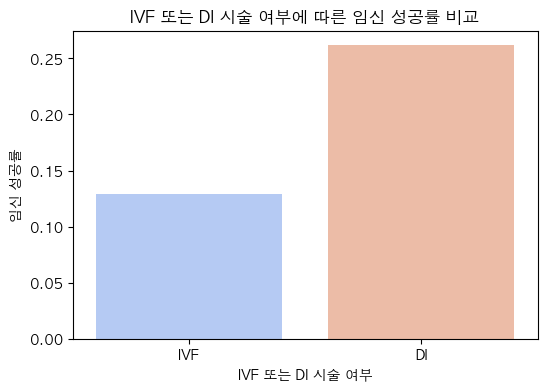

   시술 유형  임신 성공 여부
0      0  0.128914
1      1  0.261605


In [89]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 📌 IVF 또는 DI 여부별 임신 성공률 계산
success_rates = df.groupby("시술 유형")["임신 성공 여부"].mean()

# 📌 데이터프레임 변환
success_rates_df = success_rates.reset_index()

di_sample = resample(di_group, replace=False, n_samples=len(ivf_group), random_state=42)

# IVF 그룹과 샘플링된 DI 그룹 합치기
balanced_df = pd.concat([ivf_group, di_sample])

# 샘플 크기 확인
print(balanced_df["시술 유형"].value_counts())

# 📌 MacOS에서 한글 폰트 설정
plt.rcParams['font.family'] = "AppleGothic"  # 애플 기본 한글 폰트

# 📌 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=success_rates_df["시술 유형"], y=success_rates_df["임신 성공 여부"], palette="coolwarm")
plt.xticks([0, 1], ["IVF", "DI"])
plt.ylabel("임신 성공률")
plt.xlabel("IVF 또는 DI 시술 여부")
plt.title("IVF 또는 DI 시술 여부에 따른 임신 성공률 비교")
plt.show()

# 결과 출력
print(success_rates_df)

In [81]:
import scipy.stats as stats
import pandas as pd

# IVF(0) vs DI(1) 그룹의 성공/실패 빈도 테이블 생성
contingency_table = pd.crosstab(df["시술 유형"], df["임신 성공 여부"])

# 카이제곱 검정 실행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p:.4f}")

# p-value < 0.05이면 유의미한 차이가 있음!
if p < 0.05:
    print("✅ IVF와 DI 간의 임신 성공률 차이가 통계적으로 유의미함!")
else:
    print("❌ IVF와 DI 간의 차이가 유의미하지 않음. 단순한 우연일 가능성 있음.")

카이제곱 통계량: 563.2113
p-value: 0.0000
✅ IVF와 DI 간의 임신 성공률 차이가 통계적으로 유의미함!


In [ ]:
# 배아 관련 변수 목록 (결측값 6291개인 변수들)
embryo_related_columns = [
    "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
    "배아 생성 주요 이유", "총 생성 배아 수", "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수", "이식된 배아 수", "미세주입 배아 이식 수",
    "저장된 배아 수", "미세주입 후 저장된 배아 수", "해동된 배아 수",
    "해동 난자 수", "수집된 신선 난자 수", "저장된 신선 난자 수",
    "혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "기증자 정자와 혼합된 난자 수",
    "동결 배아 사용 여부", "신선 배아 사용 여부", "기증 배아 사용 여부",
    "대리모 여부"
]

# 📌 "시술 유형"이 1 (DI 시술을 받은 경우) & 해당 변수가 결측값(NaN)인 경우만 -1로 변경
df.loc[(df["시술 유형"] == 1) & (df[embryo_related_columns].isnull()), embryo_related_columns] = -1

# 📌 결과 확인 (모든 결측값이 0인지 확인)
print(df[embryo_related_columns].isnull().sum())  # 모든 결측값이 0이어야 함

In [1]:
# 📌 모델 예측
y_pred = model.predict(test_data)  # 예측값 생성

# 📌 ID와 예측값을 함께 저장 (결과 제출용)
submission = pd.DataFrame({'ID': test_ids, 'probability': y_pred})

# 📌 CSV 파일로 저장
submission.to_csv("doublekill.csv", index=False)

print("✅ 제출 파일 저장 완료: doublekiill.csv")

📌 Train 데이터 결측치 개수:
ID                            0
시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
                          ...  
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
임신 성공 여부                      0
Length: 69, dtype: int64

📌 Test 데이터 결측치 개수:
ID                           0
시술 시기 코드                     0
시술 당시 나이                     0
임신 시도 또는 마지막 임신 경과 연수    86770
시술 유형                        0
                         ...  
난자 채취 경과일                19949
난자 해동 경과일                89575
난자 혼합 경과일                18579
배아 이식 경과일                15246
배아 해동 경과일                76117
Length: 68, dtype: int64


✅ 데이터 전처리 완료!
📁 Train 파일 저장 완료: /Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv
📁 Test 파일 저장 완료: /Users/yudayeon/Desktop/캡스톤_결과/open/test_cleaned.csv


In [19]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# 📌 데이터 로드
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv"
train_df = pd.read_csv(train_path, encoding="utf-8")

# 📌 결과 변수 지정 (결과 변수명을 실제 데이터에 맞게 변경)
target_variable = "임신 성공 여부"  # 예: '출산 성공 여부', '임신 여부' 등

# 📌 수치형 변수만 필터링
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

# 📌 결과 변수 제외하고 상관관계 분석
if target_variable in numeric_columns:
    numeric_columns.remove(target_variable)
else:
    raise ValueError(f"결과 변수 '{target_variable}'이(가) 데이터에 존재하지 않습니다. 정확한 컬럼명을 입력하세요.")

# 📌 유효한 변수만 필터링 (NaN, inf, 상수값 제거)
valid_columns = []
for col in numeric_columns:
    if train_df[col].nunique() > 1 and not train_df[col].isna().any() and np.isfinite(train_df[col]).all():
        valid_columns.append(col)

# 📌 상관계수 및 p-value 계산
correlation_results = []
for col in valid_columns:
    corr, p_value = stats.pearsonr(train_df[col], train_df[target_variable])
    correlation_results.append((col, corr, p_value))

# 📌 데이터프레임 변환
correlation_df = pd.DataFrame(correlation_results, columns=["변수", "상관계수", "p-value"])

# 📌 유의 수준 0.05 이하 필터링 및 정렬
significant_correlation = correlation_df[correlation_df["p-value"] < 0.05].sort_values(by="상관계수", ascending=False)

# 📌 결과 출력
print("✅ 유의 수준 0.05 이하의 변수들:")
print(significant_correlation)


✅ 유의 수준 0.05 이하의 변수들:
                       변수      상관계수        p-value
6             단일 배아 이식 여부  0.139127   0.000000e+00
40            신선 배아 사용 여부  0.053753  2.493300e-163
41            기증 배아 사용 여부  0.047636  1.150822e-128
2                   시술 유형  0.046901  8.740664e-125
42                 대리모 여부  0.044899  1.645638e-114
17          불임 원인 - 남성 요인  0.037908   3.682036e-82
4                배란 자극 여부  0.033212   1.739173e-63
8        착상 전 유전 진단 사용 여부  0.027970   1.524524e-45
18          불임 원인 - 배란 장애  0.025021   8.635398e-37
46               여성_불임_개수  0.014177   7.051074e-13
36                  정자 출처  0.011835   2.064948e-09
38              정자 기증자 나이  0.010932   3.109040e-08
33              IVF 출산 횟수  0.009728   8.415510e-07
32                총 출산 횟수  0.007696   9.757139e-05
0                시술 시기 코드  0.005298   7.305462e-03
30              IVF 임신 횟수  0.005129   9.401916e-03
43              PGD 시술 여부  0.004471   2.359075e-02
34               DI 출산 횟수 -0.006187   1.731552e-03
39       

✅ 랜덤 포레스트 모델 성능:
🎯 정확도(Accuracy): 0.7216
🎯 F1-score: 0.6470
📌 5-Fold CV 평균 정확도: 0.7223


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/pyth

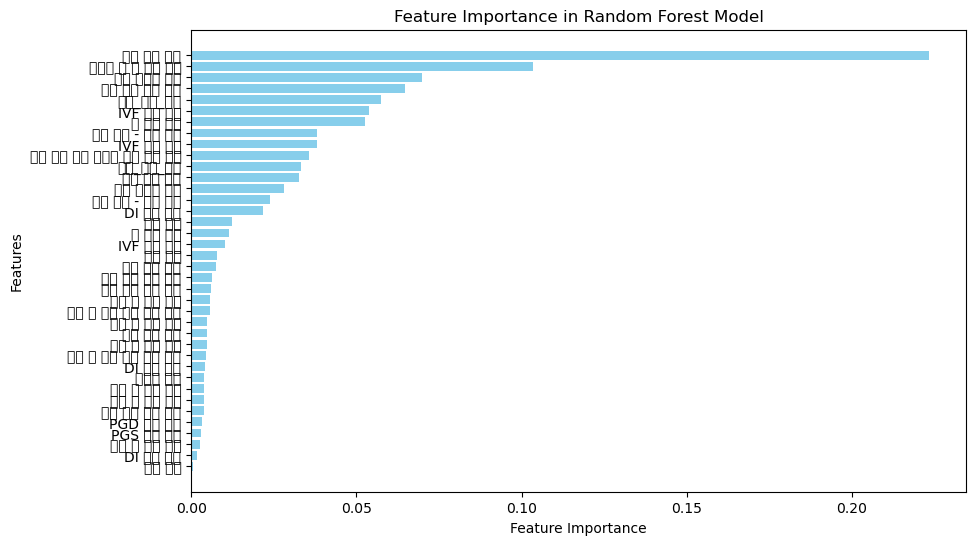

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 📌 데이터 로드
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train_cleaned.csv"
train_df = pd.read_csv(train_path, encoding="utf-8")

# 📌 결과 변수 지정 (결과 변수명을 실제 데이터에 맞게 변경)
target_variable = "임신 성공 여부"  # 예: '출산 성공 여부', '임신 여부' 등

# 📌 사용할 변수 리스트 (유의미한 변수만 사용)
significant_features = [
    "단일 배아 이식 여부", "신선 배아 사용 여부", "기증 배아 사용 여부", "시술 유형", "대리모 여부",
    "불임 원인 - 남성 요인", "배란 자극 여부", "착상 전 유전 진단 사용 여부", "불임 원인 - 배란 장애",
    "여성_불임_개수", "정자 출처", "정자 기증자 나이", "IVF 출산 횟수", "총 출산 횟수",
    "시술 시기 코드", "IVF 임신 횟수", "PGD 시술 여부", "DI 출산 횟수",
    "동결 배아 사용 여부", "DI 임신 횟수", "PGS 시술 여부", "남성 주 불임 원인",
    "부부 부 불임 원인", "여성 주 불임 원인", "남성 부 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "DI 시술 횟수", "임신 시도 또는 마지막 임신 경과 연수",
    "착상 전 유전 검사 사용 여부", "시술_유형_개수", "특정 시술 유형", "난자 기증자 나이",
    "배란 유도 유형", "난자 출처", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "총 시술 횟수"
]

# 📌 유의미한 변수만 포함한 데이터셋 생성
X = train_df[significant_features]
y = train_df[target_variable]

# 📌 학습 데이터 분할 (Train 80% / Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📌 예측 및 평가
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"✅ 랜덤 포레스트 모델 성능:")
print(f"🎯 정확도(Accuracy): {accuracy:.4f}")
print(f"🎯 F1-score: {f1:.4f}")

# 📌 교차 검증 (5-Fold CV)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"📌 5-Fold CV 평균 정확도: {np.mean(cv_scores):.4f}")

# 📌 변수 중요도 시각화
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

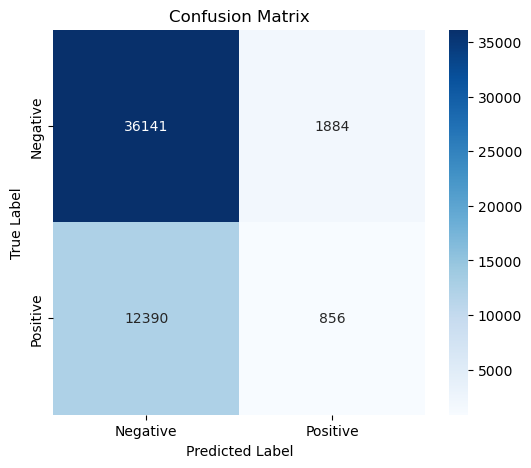

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 📌 예측값 생성 (이전 모델 학습 후 y_pred 사용)
y_pred = rf_model.predict(X_test)

# 📌 Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 📌 Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()